In [40]:
#import modules
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import random
from tqdm.notebook import tqdm
warnings.filterwarnings('ignore')
%matplotlib inline

import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from keras.preprocessing.image import load_img
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D

In [41]:
TRAIN_DIR='/kaggle/input/facial-expression-dataset/train/train/'
TEST_DIR='/kaggle/input/facial-expression-dataset/test/test/'

In [42]:
def load_dataset(directory):
    image_paths=[]
    labels=[]

    for label in os.listdir(directory):
        for filename in os.listdir(directory+label):
            image_path=os.path.join(directory,label,filename)
            image_paths.append(image_path)
            labels.append(label)
        print(label,"Completed")
    return image_paths,labels

In [43]:
#convert into dataframe


train=pd.DataFrame()
train['image'],train['label']=load_dataset(TRAIN_DIR)

train=train.sample(frac=1).reset_index(drop=True)
train.head()


surprise Completed
fear Completed
angry Completed
neutral Completed
sad Completed
disgust Completed
happy Completed


,image,label
0,/kaggle/input/facial-expression-dataset/train/...,happy
1,/kaggle/input/facial-expression-dataset/train/...,neutral
2,/kaggle/input/facial-expression-dataset/train/...,sad
3,/kaggle/input/facial-expression-dataset/train/...,happy
4,/kaggle/input/facial-expression-dataset/train/...,fear


In [44]:
#convert into dataframe


test=pd.DataFrame()
test['image'],test['label']=load_dataset(TEST_DIR)

test.head()


surprise Completed
fear Completed
angry Completed
neutral Completed
sad Completed
disgust Completed
happy Completed


,image,label
0,/kaggle/input/facial-expression-dataset/test/t...,surprise
1,/kaggle/input/facial-expression-dataset/test/t...,surprise
2,/kaggle/input/facial-expression-dataset/test/t...,surprise
3,/kaggle/input/facial-expression-dataset/test/t...,surprise
4,/kaggle/input/facial-expression-dataset/test/t...,surprise


Exploratory Data Analysis


<Axes: xlabel='label', ylabel='count'>

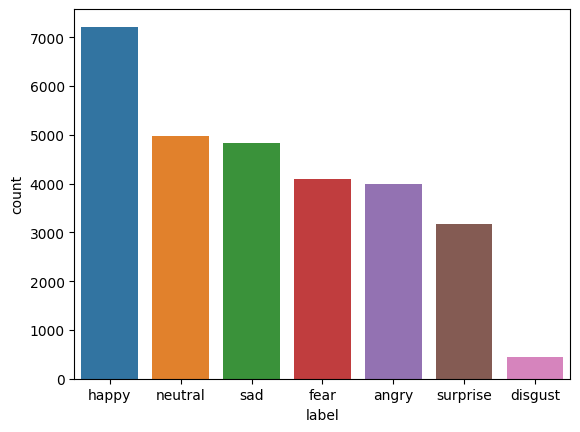

In [47]:
sns.countplot(x='label', data=train)


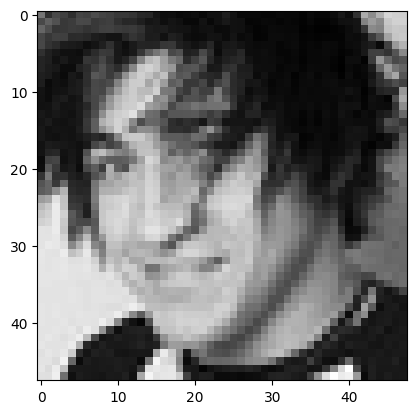

In [48]:

from PIL import Image
img=Image.open(train ['image'][0])
plt.imshow(img,cmap='gray')

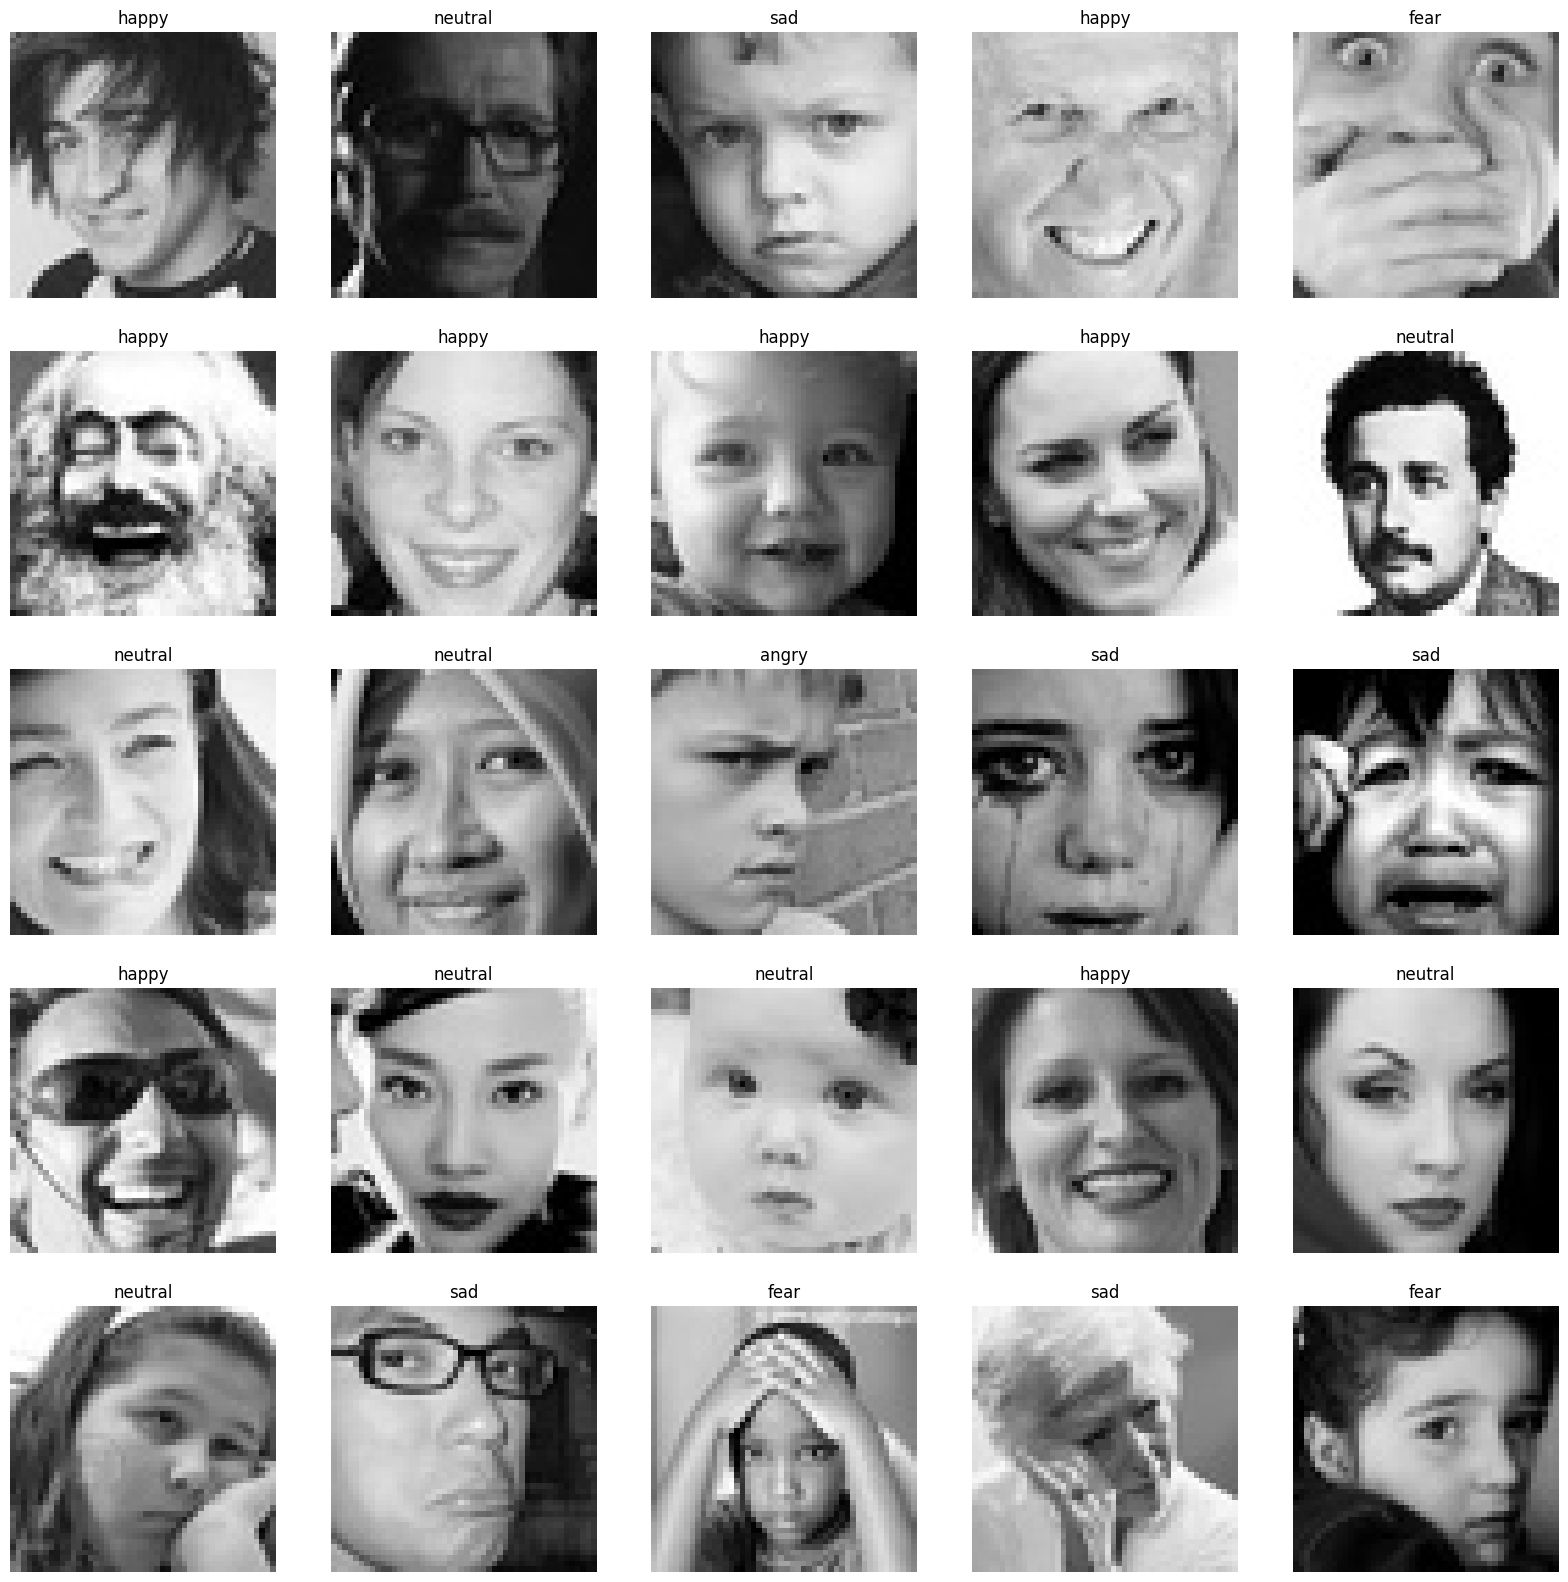

In [49]:
# to do display images
plt.figure(figsize=(20,20))
files=train.iloc[0:25]
for index, file, label in files.itertuples():
    plt.subplot(5,5,index+1)
    img=load_img(file)
    img=np.array(img)
    plt.imshow(img)
    plt.title(label)
    plt.axis('off')
    

Feature Extraction

In [50]:
def extract_features(images):
    features = []
    for image in tqdm(images):
        img = load_img(image,color_mode='grayscale')
        img = np.array(img)
        features.append(img)
    features = np.array(features)
    features = features.reshape(len(features), 48, 48, 1)
    return features

In [51]:
train_features=extract_features(train['image'])

  0%|          | 0/28709 [00:00<?, ?it/s]

In [52]:
test_features=extract_features(test['image'])

  0%|          | 0/7178 [00:00<?, ?it/s]

In [53]:
#normalize the image
x_train=train_features/255.0
x_test=test_features/255.0


In [54]:
## convert label into integer
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
le.fit(train['label'])
y_train=le.transform (train['label'])
y_test=le.transform(test['label'])

In [55]:
y_train=to_categorical(y_train,num_classes=7)
y_test=to_categorical(y_test,num_classes=7)

In [56]:
y_train[0]

array([0., 0., 0., 1., 0., 0., 0.])

In [57]:
#config
input_shape =(48,48,1)
output_class=7

Model Creation

In [58]:
model = Sequential()
# convolutional layers
model.add(Conv2D(128, kernel_size=(3,3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(256, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Flatten())
# fully connected layers
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
# output layer
model.add(Dense(output_class, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [59]:
# train the model
history =model.fit(x=x_train,y=y_train,batch_size=128,epochs=60,validation_data=(x_test,y_test))

Epoch 1/60
225/225 ━━━━━━━━━━━━━━━━━━━━ 22s 59ms/step - accuracy: 0.2408 - loss: 1.8379 - val_accuracy: 0.2471 - val_loss: 1.8171
Epoch 2/60
225/225 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - accuracy: 0.2555 - loss: 1.8073 - val_accuracy: 0.2536 - val_loss: 1.7857
Epoch 3/60
225/225 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - accuracy: 0.2663 - loss: 1.7632 - val_accuracy: 0.3044 - val_loss: 1.6747
Epoch 4/60
225/225 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - accuracy: 0.3266 - loss: 1.6744 - val_accuracy: 0.4159 - val_loss: 1.5026
Epoch 5/60
225/225 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - accuracy: 0.3869 - loss: 1.5673 - val_accuracy: 0.4452 - val_loss: 1.4214
Epoch 6/60
225/225 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - accuracy: 0.4291 - loss: 1.4784 - val_accuracy: 0.4700 - val_loss: 1.3841
Epoch 7/60
225/225 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - accuracy: 0.4417 - loss: 1.4352 - val_accuracy: 0.4990 - val_loss: 1.3120
Epoch 8/60
225/225 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - accuracy: 0.4666 - loss: 1.3966 - val_acc

Plot the Results


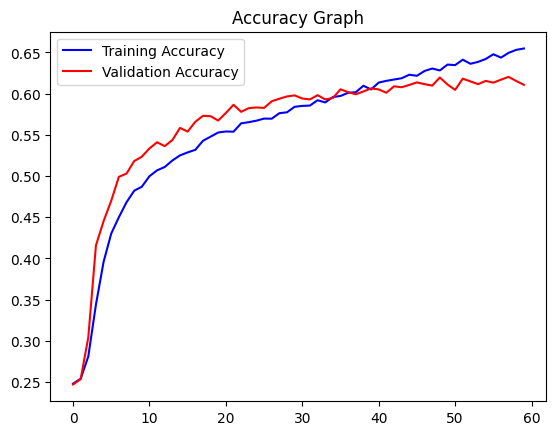

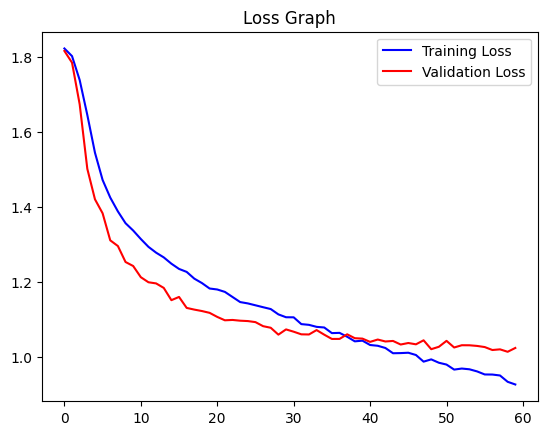

In [60]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Accuracy Graph')
plt.legend()
plt.figure()

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Loss Graph')
plt.legend()

plt.show()

Test with Image data


Original Output: sad
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 385ms/step
Predicted Output: neutral


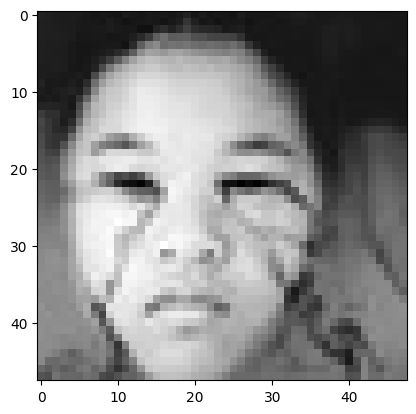

In [61]:
image_index = random.randint(0, len(test))
print("Original Output:", test['label'][image_index])
pred = model.predict(x_test[image_index].reshape(1, 48, 48, 1))
prediction_label = le.inverse_transform([pred.argmax()])[0]
print("Predicted Output:", prediction_label)
plt.imshow(x_test[image_index].reshape(48, 48), cmap='gray');